# <center> Descriptivas SSEE procesos de racionalización 2019 - 2021<center>

**Proyecto:**
Análisis descriptivo resultados procesos de racionalización

**Autor:**
María de la Guarda - Coordinación de analítica de datos

**Revisión y modificaciones:**
Carlos Ramírez - Coordinación de plazas y remuneraciones - Racionalización

**Fecha de última modificación:**
26.07.2022


<hr style="height:2px;border-width:0;color:black;background-color:black">

## Fuentes de códigos externos utilizados

1. Utilizar API onedrive para descarga directa de BD

    Link: [Descarga base onedrive](https://towardsdatascience.com/onedrive-as-data-storage-for-python-project-2ff8d2d3a0aa)


## 0. Importación librerías y definición de funciones

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import base64
import gc

In [2]:
# Onedrive url para descargar archivos

def create_onedrive_directdownload (onedrive_link):
    data_bytes64 = base64.b64encode(bytes(onedrive_link, 'utf-8'))
    data_bytes64_String = data_bytes64.decode('utf-8').replace('/','_').replace('+','-').rstrip("=")
    resultUrl = f"https://api.onedrive.com/v1.0/shares/u!{data_bytes64_String}/root/content"
    return resultUrl

## 1. Limpieza base de datos

In [3]:
#Importamos base csv

onedrive_link = "https://1drv.ms/u/s!AodhAFTTDqU00wyU_YCagDu8mORL?e=HsDdWj"
onedrive_directdownload = create_onedrive_directdownload(onedrive_link)

base=pd.read_csv(onedrive_directdownload, low_memory=False)
base = base.drop(base[base.cod_mod=='S150205'].index)

base = base.loc[:, ~base.columns.str.contains('^Unnamed')]
base.head()

,cod_mod,codlocal,dir_n,dir_c,sub_dir_n,sub_dir_c,jer_n,jer_c,doc_aula_n,doc_aula_c,...,d_estado,region,tipo_entidad,jec,ruralidad,vraem,frontera,bilingue,caracteristica,year
0,0002212,427658.0,0,0,0,0,0,0,3,2,...,Activa,PIURA,UGEL EJECUTORA,JEC,Rural 1,No Vraem,No frontera,No bilingue,Completo,2020
1,0200014,53828.0,0,0,0,0,0,0,2,0,...,Activa,APURIMAC,UGEL EJECUTORA,NaN,Rural 2,No Vraem,No frontera,Bilingue,Multigrado,2020
2,0200022,53833.0,0,0,0,0,0,0,1,0,...,Activa,APURIMAC,UGEL EJECUTORA,NaN,Rural 2,No Vraem,No frontera,Bilingue,Unidocente,2020
3,0200030,53847.0,0,0,0,0,0,0,2,0,...,Activa,APURIMAC,UGEL EJECUTORA,NaN,Rural 2,No Vraem,No frontera,Bilingue,Multigrado,2020
4,0200048,53852.0,0,0,0,0,0,0,2,0,...,Activa,APURIMAC,UGEL EJECUTORA,NaN,Rural 2,No Vraem,No frontera,Bilingue,Multigrado,2020


## 2. Análisis descriptivo

> **Identificación alumnos en matrícula**
* Inicial (A1, A2, A3): 0 es alumnos en cuna, 1 es alumnos de 3 años, 2 es alumnos de 4 años y 3 es alumnos de 5 años. El resto de categorías deberían ser missing
* Primaria (B0): 0 no existe. Del 1 al 6 es lo usual en primaria 
* Secundaria (F0): Solo esa del 1 al 5. El 0 y el 6 deben ser missing

> **Enlaces de preguntas**

* **[Ir a primera pregunta](#primera_pregunta)**

* **[Ir a segunda pregunta](#segunda_pregunta)**

* **[Ir a tercera pregunta](#segunda_pregunta)**

<hr style="height:2px;border-width:0;color:black;background-color:black">

<a id='primera_pregunta'></a>

## 2.1. ¿Qué servicio no sigue la norma? ¿por qué?

**Procedimiento**
* <p style='text-align: justify;'>Primero se calcula las secciones en base a los ratios de asignación del Cuadro 6 que se encuentra en la Resolución Viceministerial N° 307 - 2019 - MINEDU </p>
* <p style='text-align: justify;'> A partir de los resultados, se halla la variable secciones ajuste que es el diferencial entre las secciones calculadas en el proceso de racionalización y las secciones en base a la norma. No se considera ningún tipo de flexibilidad que incorporan los racionalizadores en el momento de la evaluación. </p>
* <p style='text-align: justify;'> Luego de obtener la variable secciones ajuste, se procede a generar tablas de frecuencias en intervalos, gráficos de caja e histogramas por cada nivel de Educación Básica Regular </p>

**Resultados**
> **[Nivel inicial](#inicial)**
* <p style='text-align: justify;'> A partir de la tabla de frecuencias en intervalos, se observa que casi la totalidad de observaciones se encuentran en el rango desde 4 secciones faltantes hasta 4 secciones asignadas adicionalmente respecto al cálculo de la norma. Asimismo, al revisar la tabla de frecuencias, el 51.7% de las observaciones cuentan con una asignación igual a la norma. </p>
* <p style='text-align: justify;'> Considerando el gráfico de la caja, se observa que la mediana se encuentra donde la asignación de la norma es igual a la de la evaluación. Por otro lado, los valores atípicos aproximadamente se encuentran donde la asignación en el proceso es superior a dos secciones respecto a la norma y donde la asignación en el proceso es inferior a más de menos dos secciones respecto a la norma.</p>
* <p style='text-align: justify;'> Por último, tomando en cuenta el histograma para el nivel inicial se observa un resultado similar a lo descrito por la tabla de frecuencias en intervalos, donde la concentración de los datos se registra en el intervalo donde la diferencia de secciones es de +/-4.</p>

> **[Nivel primaria](#primaria)**
* <p style='text-align: justify;'> Tomando en cuenta la tabla de frecuencias en intervalos, la mayor parte de observaciones se concentran en el rango desde 15 secciones faltantes hasta 12 secciones adicionales asignadas adicionalmente respecto al cálculo de la norma. Asimismo, al revisar la tabla de frecuencias, alrededor del 52.7% de las observaciones cuentan con una asignación igual a la norma</p>
* <p style='text-align: justify;'> Respecto al gráfico de la caja, los valores calculados de su mediana y cuartiles, se puede indicar que la mediana se encuentra donde la asignación de la norma es igual a la de la evaluación. Adicionalmente, se puede mencionar que los valores atípicos de la izquierda se encuentran cuando la asignación en el proceso es igual o menor a menos tres secciones respecto a la norma y los valores atípicos a la derecha están presentes cuando la asignación en el proceso es superior al menos por dos secciones</p>
* <p style='text-align: justify;'> Por último, a partir del histograma para el nivel primaria se observa que la concentración de los datos se registra en el intervalo donde la diferencia de secciones es de +/-5 </p>

> **[Nivel secundaria](#secundaria)**
* <p style='text-align: justify;'> Tomando en cuenta la tabla de frecuencias en intervalos, la mayor parte de observaciones se concentran en el rango desde 4 secciones faltantes hasta 4 secciones adicionales asignadas adicionalmente respecto al cálculo de la norma. Asimismo, al revisar la tabla de frecuencias, alrededor del 47.7% de las observaciones cuentan con una asignación igual a la norma </p>
* <p style='text-align: justify;'> Respecto al gráfico de la caja, los valores calculados de su mediana y cuartiles, se puede indicar que la mediana se encuentra donde la asignación de la norma es igual a la de la evaluación. Adicionalmente, se puede mencionar que los valores atípicos de la izquierda se encuentran cuando la asignación en el proceso es igual o menor a  menos tres secciones respecto a la norma y los valores atípicos a la derecha están presentes cuando la asignación en el proceso es superior al menos por dos secciones </p>
* <p style='text-align: justify;'> Por último, a partir del histograma para el nivel primaria se observa que la concentración de los datos se registra en el intervalo donde la diferencia de secciones es de +/-5 </p>

> **[Análisis conjunto](#observacion)**
* <p style='text-align: justify;'> Existe una tendencia a registrar una cantidad de secciones inferior a la norma. En promedio, el nivel educativo de primaria tiene una mayor brecha de secciones faltantes respecto a los otros niveles de Educación Básica Regular. Asimismo, tomar en cuenta que es el nivel con más observaciones.  </p>



In [4]:
## Hallamos los alumnos iniciales, según cuadro N°6 de la norma de racio:

base['alumnos_norma']=0

# Inicial + polidocente + rural
base.loc[((base['niv_mod'].str.find('A')!=-1))&(base['ruralidad']!="Urbano")
         &(base['caracteristica']=="Completo"), 'alumnos_norma'] = 20

# Inicial + unidocente + rural
base.loc[((base['niv_mod'].str.find('A')!=-1))&(base['ruralidad']!="Urbano")
         &(base['caracteristica']=="Unidocente"), 'alumnos_norma' ] = 15

# Inicial + polidocente + urbano
base.loc[((base['niv_mod'].str.find('A')!=-1))
         &(base['ruralidad']=="Urbano"), 'alumnos_norma' ] = 25

# Primaria + polidocente completo + rural
base.loc[(base['niv_mod']=="B0")&(base['ruralidad']!="Urbano")
         &(base['caracteristica']=="Completo"), 'alumnos_norma' ] = 25

# Primaria + polidocente multigrado + rural
base.loc[(base['niv_mod']=="B0")&(base['ruralidad']!="Urbano")
         &(base['caracteristica']=="Multigrado"), 'alumnos_norma' ] = 20

# Primaria + unidocente + rural
base.loc[(base['niv_mod']=="B0")&(base['ruralidad']!="Urbano")
         &(base['caracteristica']=="Unidocente"), 'alumnos_norma' ] = 15

# Primaria + polidocente completo + urbano
base.loc[(base['niv_mod']=="B0")&(base['ruralidad']=="Urbano")
         &(base['caracteristica']=="Completo"), 'alumnos_norma' ] = 30

# Primaria + polidocente multigrado + urbano
base.loc[(base['niv_mod']=="B0")&(base['ruralidad']=="Urbano")
         &(base['caracteristica']=="Multigrado"), 'alumnos_norma' ] = 25

# Secundaria + polidocente completo + rural
base.loc[(base['niv_mod']=="F0")&(base['ruralidad']!="Urbano"), 'alumnos_norma' ] = 25

# Secundaria + polidocente completo + urbano
base.loc[(base['niv_mod']=="F0")&(base['ruralidad']=="Urbano"), 'alumnos_norma' ] = 30

In [5]:
## Ya tenemos los alumnos, ahora hallamos las secciones. Hacemos un bucle por cada # de grado (del 1 al 6):

base['secciones_norma']=0
base['np_secciones_norma'] = np.array(base['secciones_norma'])
base['np_alumnos_norma'] = np.array(base['alumnos_norma'])

for x in range(0, 7):
    base['np_cant{x} (t)'] = np.array(base[f'cant{x} (t)'])
    base[f'secciones_norma_{x}'] = (base['np_cant{x} (t)']) / base[f'np_alumnos_norma']
    base.replace([np.inf, -np.inf],np.nan, inplace=True) 
    #base[base[f'secciones_norma_{x}'] == inf] = 0
    base[f'secciones_norma_{x}'] = base[f'secciones_norma_{x}'].fillna(0)
    #np.ceil(base[f'secciones_norma_{x}']).astype("int64") 
    base[f'secciones_norma_{x}'] = base[f'secciones_norma_{x}'].apply(lambda X: int(math.ceil(X)))
    #base[f'secciones_norma_{x}'] = math.ceil(base[f'secciones_norma_{x}'])
    base[f'np_secciones_norma'] = base[f'np_secciones_norma'] + base[f'secciones_norma_{x}']

In [6]:
## Realizamos ajuste por servicios unidocentes
base.loc[((base['niv_mod'].str.find('A')!=-1)&(base['caracteristica']=="Unidocente") | 
         (base['niv_mod']=='B0')&(base['caracteristica']=="Unidocente")),'np_secciones_norma']=1

## Realizamos ajuste por servicios multigrado - calculamos los ciclos 
for x in range(1, 4):
    base['ciclo_{x}'] = 0

for x in range(0,3):
    y = 1 + 2*x
    z = 2 + 2*x
    x = x + 1
    base.loc[(base['niv_mod']=='B0')&(base['caracteristica']=="Multigrado"),
             f'ciclo_{x}']=base[f'cant{y} (t)'] + base[f'cant{z} (t)']
    
#Primaria multigrado - zona rural
base.loc[((base['niv_mod']=='B0') &(base['ruralidad']!="Urbano") 
           & (base['ciclo_1']<=20) & (base['ciclo_2']<=20) & (base['ciclo_3']<=20)),'np_secciones_norma'] = 3

base.loc[(((base['niv_mod']=='B0') &(base['ruralidad']!="Urbano") 
           & (base['ciclo_1']>20) & (base['ciclo_2']<=20) & (base['ciclo_3']<=20)) | 
          ((base['niv_mod']=='B0') &(base['ruralidad']!="Urbano") 
           & (base['ciclo_1']<=20) & (base['ciclo_2']>20) & (base['ciclo_3']<=20)) | 
          ((base['niv_mod']=='B0') &(base['ruralidad']!="Urbano") 
           & (base['ciclo_1']<=20) & (base['ciclo_2']<=20) & (base['ciclo_3']>20))),'np_secciones_norma'] = 4

base.loc[(((base['niv_mod']=='B0') &(base['ruralidad']!="Urbano") 
           & (base['ciclo_1']>20) & (base['ciclo_2']>20) & (base['ciclo_3']<=20)) | 
          ((base['niv_mod']=='B0') &(base['ruralidad']!="Urbano") 
           & (base['ciclo_1']<=20) & (base['ciclo_2']>20) & (base['ciclo_3']>20)) | 
          ((base['niv_mod']=='B0') &(base['ruralidad']!="Urbano") 
           & (base['ciclo_1']>20) & (base['ciclo_2']<=20) & (base['ciclo_3']>20))),'np_secciones_norma'] = 5

base.loc[(((base['niv_mod']=='B0') &(base['ruralidad']!="Urbano") 
           & (base['ciclo_1']>20) & (base['ciclo_2']>20) & (base['ciclo_3']>20))),'np_secciones_norma'] = 6

#Primaria multigrado - zona urbana
base.loc[((base['niv_mod']=='B0') &(base['ruralidad']=="Urbano") 
           & (base['ciclo_1']<=25) & (base['ciclo_2']<=25) & (base['ciclo_3']<=25)),'np_secciones_norma'] = 3

base.loc[(((base['niv_mod']=='B0') &(base['ruralidad']!="Urbano") 
           & (base['ciclo_1']>25) & (base['ciclo_2']<=25) & (base['ciclo_3']<=25)) | 
          ((base['niv_mod']=='B0') &(base['ruralidad']!="Urbano") 
           & (base['ciclo_1']<=25) & (base['ciclo_2']>25) & (base['ciclo_3']<=25)) | 
          ((base['niv_mod']=='B0') &(base['ruralidad']!="Urbano") 
           & (base['ciclo_1']<=25) & (base['ciclo_2']<=25) & (base['ciclo_3']>25))),'np_secciones_norma'] = 4

base.loc[(((base['niv_mod']=='B0') &(base['ruralidad']!="Urbano") 
           & (base['ciclo_1']>25) & (base['ciclo_2']>25) & (base['ciclo_3']<=25)) | 
          ((base['niv_mod']=='B0') &(base['ruralidad']!="Urbano") 
           & (base['ciclo_1']<=25) & (base['ciclo_2']>25) & (base['ciclo_3']>25)) | 
          ((base['niv_mod']=='B0') &(base['ruralidad']!="Urbano") 
           & (base['ciclo_1']>25) & (base['ciclo_2']<=25) & (base['ciclo_3']>25))),'np_secciones_norma'] = 5

base.loc[(((base['niv_mod']=='B0') &(base['ruralidad']!="Urbano") 
           & (base['ciclo_1']>25) & (base['ciclo_2']>25) & (base['ciclo_3']>25))),'np_secciones_norma'] = 6    

In [7]:
# Hallamos la diferencia entre las necesarias (reales) - las establecidas por la norma
base['np_secciones_necesarias'] = np.array(base['secciones_necesarias'])
base['secciones_ajuste']=base['secciones_necesarias']-base['np_secciones_norma']

<a id='inicial'></a>
## DISTRIBUCIÓN PARA INICIAL: 

<a id='frecuencia_inicial'></a>
**Tabla de frecuencias en intervalos**

In [8]:
#Intervalo de diferencia de ajuste por grado
    
base_inicial = base.loc[(base['niv_mod'].str.find('A')!=-1)] 

k = 1 + 3.322 * math.log10(len(base_inicial['secciones_ajuste']))
periodos = math.ceil(k)

inf = base_inicial['secciones_ajuste'].min()        # Limite inferior del primer intervalo
dif = base_inicial['secciones_ajuste'].max()
sup = base_inicial['secciones_ajuste'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

intervalos = pd.IntervalIndex([
    pd.Interval( round(i.left,0), round(i.right,0), i.closed )
    for i in intervals
])
df = pd.DataFrame(index=intervalos)
df['FreqAbs'] = pd.cut(base_inicial['secciones_ajuste'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
"[-23.0, -19.0)",4,-21.0,-23.0,-19.0
"[-19.0, -15.0)",2,-17.0,-19.0,-15.0
"[-15.0, -11.0)",10,-13.0,-15.0,-11.0
"[-11.0, -7.0)",35,-9.0,-11.0,-7.0
"[-7.0, -4.0)",116,-5.5,-7.0,-4.0
"[-4.0, 0.0)",18516,-2.0,-4.0,0.0
"[0.0, 4.0)",55581,2.0,0.0,4.0
"[4.0, 8.0)",57,6.0,4.0,8.0
"[8.0, 12.0)",4,10.0,8.0,12.0
"[12.0, 16.0)",0,14.0,12.0,16.0


<a id='caja_inicial'></a>
**Gráfico de caja y cálculo de cuartiles**

<AxesSubplot:xlabel='secciones_ajuste'>

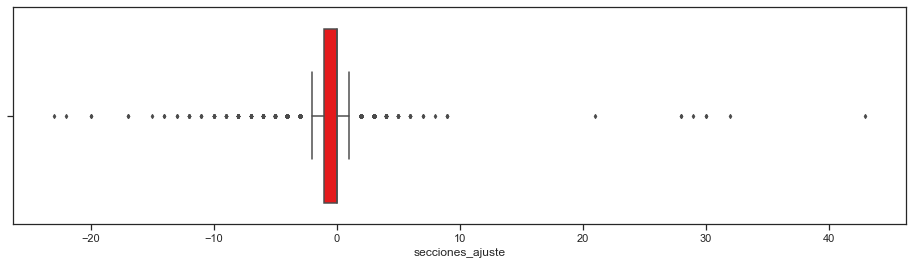

In [9]:
sns.set(rc={'figure.figsize':(16,4)})
sns.set_style("ticks")

sns.boxplot(x="secciones_ajuste",data=base_inicial,saturation=1.2,width=0.8,fliersize=3,palette="Set1")

In [10]:
q1 = base_inicial['secciones_ajuste'].quantile(0.25)
q3 = base_inicial['secciones_ajuste'].quantile(0.75)
mediana = base_inicial['secciones_ajuste'].median()

iqr = q3 - q1

minimo_caja = q1 - (1.5 * iqr)

maximo_caja = q3 + (1.5 * iqr)

print("Q1 =", q1, "; Q3 =", q3, ";mediana =", mediana)
print("Minimo caja =", minimo_caja, "; Máximo caja =", maximo_caja)

Q1 = -1.0 ; Q3 = 0.0 ;mediana = 0.0
Minimo caja = -2.5 ; Máximo caja = 1.5


<a id='histograma_inicial'></a>
**Histograma**

Text(0, 0.5, 'Frecuencia')

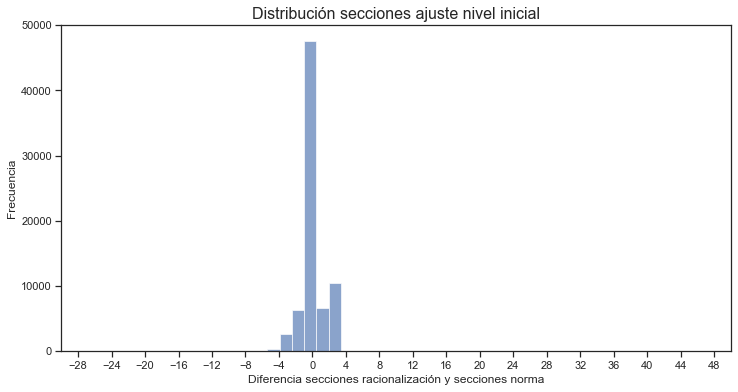

In [11]:
fig, ax = plt.subplots(figsize = (12,6))

histograma_inicial = base_inicial['secciones_ajuste'].plot(kind = "hist", alpha = 0.65, bins = 45)

histograma_inicial.xaxis.set_major_locator(ticker.MultipleLocator(4))
histograma_inicial.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.set_title("Distribución secciones ajuste nivel inicial", fontsize=16)

ax.set_xlabel("Diferencia secciones racionalización y secciones norma")
ax.set_xlim(-30,50)

ax.set_ylim(0, 50000)
ax.set_ylabel("Frecuencia")

<a id='primaria'></a>
## DISTRIBUCIÓN PARA PRIMARIA

<a id='frecuencia_primaria'></a>
**Tabla de frecuencias en intervalos**

In [12]:
base_primaria = base.loc[base['niv_mod']=="B0"] 
# Mayormente faltan muchas secciones. Promedio: de -15 a -1.5 secciones faltantes. Hay outliers importantes

k = 1 + 3.322 * math.log10(len(base_primaria['secciones_ajuste']))
periodos = math.ceil(k)

inf = base_primaria['secciones_ajuste'].min()        # Limite inferior del primer intervalo
dif = base_primaria['secciones_ajuste'].max()
sup = base_primaria['secciones_ajuste'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

intervalos = pd.IntervalIndex([
    pd.Interval( round(i.left,0), round(i.right,0), i.closed )
    for i in intervals
])
df = pd.DataFrame(index=intervalos)
df['FreqAbs'] = pd.cut(base_primaria['secciones_ajuste'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
"[-55.0, -42.0)",3,-48.5,-55.0,-42.0
"[-42.0, -28.0)",8,-35.0,-42.0,-28.0
"[-28.0, -15.0)",28,-21.5,-28.0,-15.0
"[-15.0, -2.0)",7322,-8.5,-15.0,-2.0
"[-2.0, 12.0)",82016,5.0,-2.0,12.0
"[12.0, 25.0)",10,18.5,12.0,25.0
"[25.0, 38.0)",1,31.5,25.0,38.0
"[38.0, 52.0)",1,45.0,38.0,52.0
"[52.0, 65.0)",1,58.5,52.0,65.0
"[65.0, 79.0)",0,72.0,65.0,79.0


<a id='caja_primaria'></a>
**Gráfico de caja**

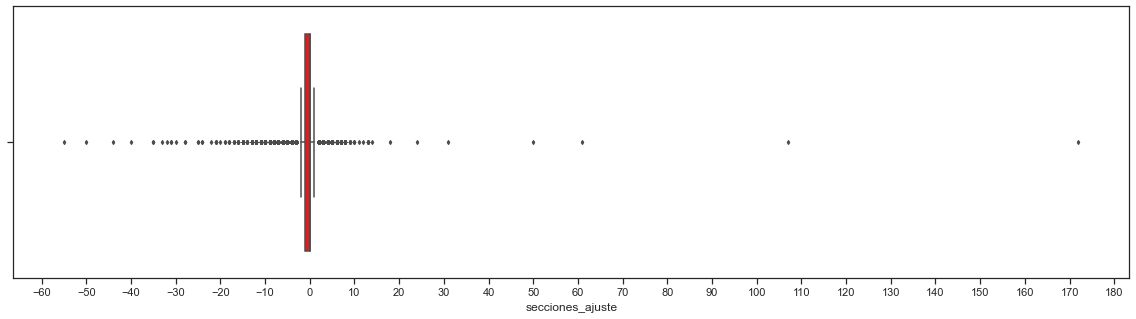

In [13]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("ticks")
caja_primaria = sns.boxplot(x="secciones_ajuste",data=base_primaria,saturation=1,width=0.8,fliersize=3,palette="Set1")

caja_primaria.xaxis.set_major_locator(ticker.MultipleLocator(10))
caja_primaria.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()


In [14]:
q1 = base_primaria['secciones_ajuste'].quantile(0.25)
q3 = base_primaria['secciones_ajuste'].quantile(0.75)
mediana = base_primaria['secciones_ajuste'].median()

iqr = q3 - q1

minimo_caja = q1 - (1.5 * iqr)

maximo_caja = q3 + (1.5 * iqr)

print("Q1 =", q1, "; Q3 =", q3, ";mediana =", mediana)
print("Minimo caja =", minimo_caja, "; Máximo caja =", maximo_caja)

Q1 = -1.0 ; Q3 = 0.0 ;mediana = 0.0
Minimo caja = -2.5 ; Máximo caja = 1.5


<a id='histograma_primaria'></a>
**Histograma**

Text(0, 0.5, 'Frecuencia')

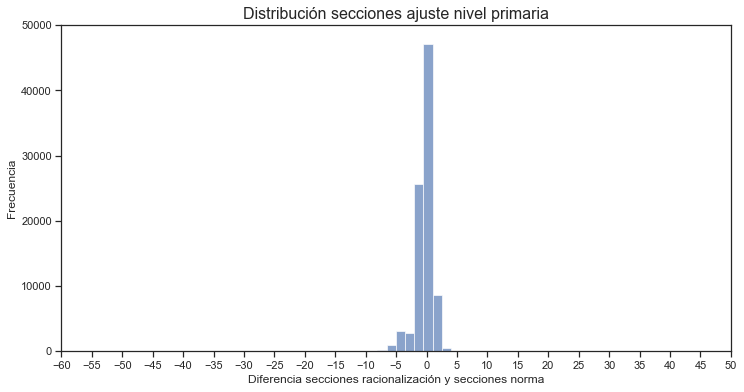

In [15]:
fig, ax = plt.subplots(figsize = (12,6))

histograma_primaria = base_primaria['secciones_ajuste'].plot(kind = "hist", alpha = 0.65, bins = 150)

histograma_primaria.xaxis.set_major_locator(ticker.MultipleLocator(5))
histograma_primaria.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.set_title("Distribución secciones ajuste nivel primaria", fontsize=16)

ax.set_xlabel("Diferencia secciones racionalización y secciones norma")
ax.set_xlim(-60, 50)

ax.set_ylim(0, 50000)
ax.set_ylabel("Frecuencia")

<a id='secundaria'></a>
## DISTRIBUCIÓN PARA SECUNDARIA 

In [16]:
base_secundaria = base.loc[base['niv_mod']=="F0"] 

k = 1 + 3.322 * math.log10(len(base_secundaria['secciones_ajuste']))
periodos = math.ceil(k)

inf = base_secundaria['secciones_ajuste'].min()        # Limite inferior del primer intervalo
dif = base_secundaria['secciones_ajuste'].max()
sup = base_secundaria['secciones_ajuste'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

intervalos = pd.IntervalIndex([
    pd.Interval( round(i.left,0), round(i.right,0), i.closed )
    for i in intervals
])
df = pd.DataFrame(index=intervalos)
df['FreqAbs'] = pd.cut(base_secundaria['secciones_ajuste'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
"[-53.0, -46.0)",1,-49.5,-53.0,-46.0
"[-46.0, -39.0)",1,-42.5,-46.0,-39.0
"[-39.0, -32.0)",8,-35.5,-39.0,-32.0
"[-32.0, -25.0)",9,-28.5,-32.0,-25.0
"[-25.0, -18.0)",26,-21.5,-25.0,-18.0
"[-18.0, -11.0)",79,-14.5,-18.0,-11.0
"[-11.0, -4.0)",1140,-7.5,-11.0,-4.0
"[-4.0, 4.0)",26997,0.0,-4.0,4.0
"[4.0, 11.0)",672,7.5,4.0,11.0
"[11.0, 18.0)",54,14.5,11.0,18.0


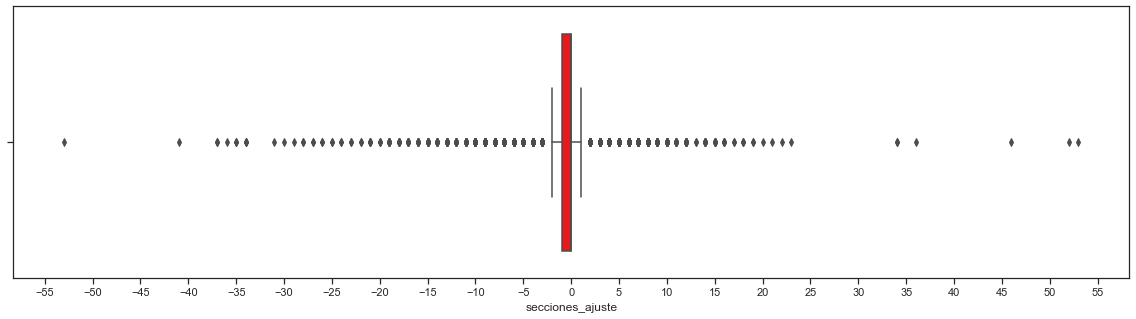

In [17]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("ticks")
caja_secundaria = sns.boxplot(x="secciones_ajuste",data=base_secundaria,saturation=1.2,width=0.8,fliersize=5,palette="Set1")

caja_secundaria.xaxis.set_major_locator(ticker.MultipleLocator(5))
caja_secundaria.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

In [18]:
q1 = base_secundaria['secciones_ajuste'].quantile(0.25)
q3 = base_secundaria['secciones_ajuste'].quantile(0.75)
mediana = base_secundaria['secciones_ajuste'].median()

iqr = q3 - q1

minimo_caja = q1 - (1.5 * iqr)

maximo_caja = q3 + (1.5 * iqr)

print("Q1 =", q1, "; Q3 =", q3, ";mediana =", mediana)
print("Minimo caja =", minimo_caja, "; Máximo caja =", maximo_caja)

Q1 = -1.0 ; Q3 = 0.0 ;mediana = 0.0
Minimo caja = -2.5 ; Máximo caja = 1.5


Text(0, 0.5, 'Frecuencia')

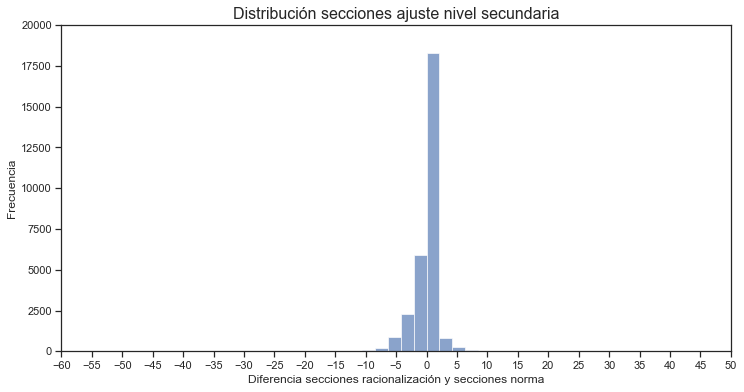

In [19]:
fig, ax = plt.subplots(figsize = (12,6))

histograma_secundaria = base_secundaria['secciones_ajuste'].plot(kind = "hist", alpha = 0.65, bins = 50)

histograma_secundaria.xaxis.set_major_locator(ticker.MultipleLocator(5))
histograma_secundaria.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.set_title("Distribución secciones ajuste nivel secundaria", fontsize=16)

ax.set_xlabel("Diferencia secciones racionalización y secciones norma")
ax.set_xlim(-60, 50)

ax.set_ylim(0, 20000)
ax.set_ylabel("Frecuencia")

<a id='observacion'></a>
## Análisis conjunto:

Text(0, 0.5, 'Frecuencia')

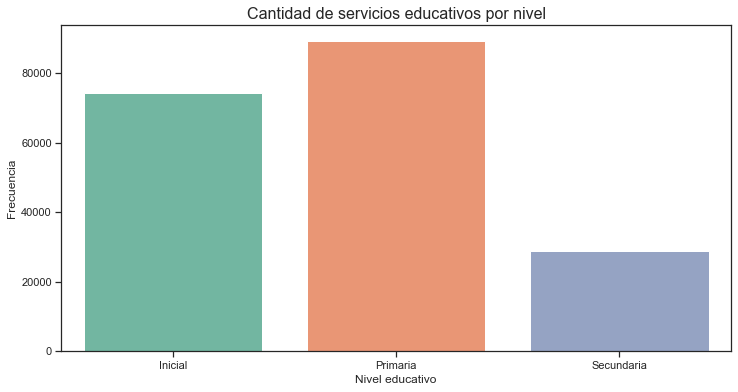

In [20]:
# Histograma de frecuencias para ver las observaciones x código modular:

base.loc[(base['niv_mod'].str.find('A')!=-1), 'nivel'] = "Inicial" 
base.loc[base['niv_mod']=="B0", 'nivel'] = "Primaria" 
base.loc[base['niv_mod']=="F0", 'nivel'] = "Secundaria" 

fig, ax = plt.subplots(figsize = (12,6))

ax.set_title("Cantidad de servicios educativos por nivel", fontsize=16)

sns.countplot(x='nivel',data=base,palette='Set2', order=['Inicial', 'Primaria', 'Secundaria'])

ax.set_xlabel("Nivel educativo")
ax.set_ylabel("Frecuencia")


Text(0, 0.5, 'Diferencia promedio')

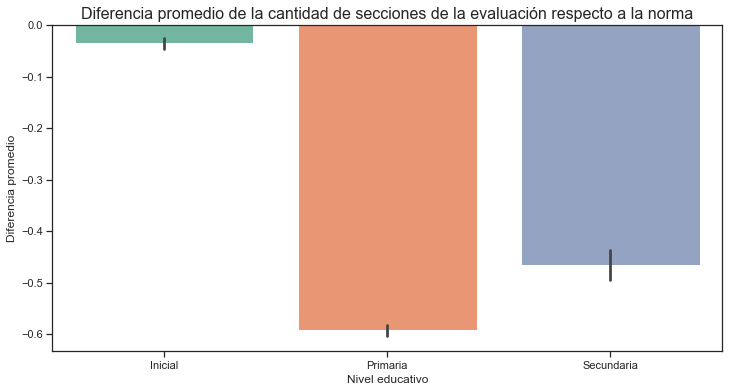

In [21]:
# secciones de ajuste por cod_mod

fig, ax = plt.subplots(figsize = (12,6))

ax.set_title("Diferencia promedio de la cantidad de secciones de la evaluación respecto a la norma", fontsize=16)

sns.barplot(x='nivel', y='secciones_ajuste', data=base,palette='Set2', order=['Inicial', 'Primaria', 'Secundaria'])

ax.set_xlabel("Nivel educativo")
ax.set_ylabel("Diferencia promedio")


<a id='segunda_pregunta'></a>
## 2.2 ¿Qué SSEE no coincide en req/exd con las secciones?

* Se realiza el comparativo de requerimientos y excedencias para las [plazas docentes](#plaza_docente) tomando de referencia los resultados del proceso de racionalización.


* Para el caso de las [plazas de auxiliares de educación](#plaza_aux_educ), [plazas jerárquicas](#plaza_jerarquica), [plazas de director](#plaza_director) y [plazas de subdirector](#plaza_sub_director) se ha realizado la asignación en base a la norma RVM 307-2019.

> **Criterios a tomar en consideración**

* <p style='text-align: justify;'> Plaza docente: El comparativo solo se puede realizar para los niveles de inicial y primaria porque en secundaria existe la asignación entre plaza y bolsa de horas por lo que los resultados no son comparables </p>
* <p style='text-align: justify;'> Plaza auxiliar de educación: El cálculo se realiza para los niveles de inicial y secundaria, en el caso de inicial falta considera las cunas. </p>
* <p style='text-align: justify;'> Plaza jerárquica: Solo se toma en consideración plazas en JER. Se debe complementar con información acerca de qué cuenten con los talleres equipados. </p>
* <p style='text-align: justify;'> Plaza director y subdirector: Cálculo por local educativo, se debe complementar análisis con el desarrollo de redes educativas. Solo se considera el año 2021 para la evaluación. </p>
<hr style="height:2px;border-width:0;color:black;background-color:black">

<a id='plaza_docente'></a>
### 2.2.1. Docentes: 

* <p style='text-align: justify;'> Para los niveles de inicial y primaria, el registro de excedentes y requerimientos en promedio está por debajo a lo que se registraría en base a la norma. En el registro de excedentes, se podría señalar que existe mayor flexibilidad en el nivel inicial mientras que en el caso de requerimientos, la flexibilidad se observa en el nivel primaria.</p>


In [22]:
base['doc_exc'] = 0
base['np_doc_exc'] = np.array(base['doc_exc'])
base['np_doc_nom'] = np.array(base['doc_aula_n'])
base['np_doc_vac'] = np.array(base['doc_aula_c'])
base['np_req_prof'] = np.array(base['doc_aula_req'])

base['np_asig_doc'] = base['np_doc_nom'] + base['np_doc_vac'] - base['np_secciones_norma']

base['np_doc_exc'] = 0
base.loc[base['np_asig_doc']>0, 'np_doc_exc'] = base['np_asig_doc']

base['np_req_prof'] = 0
base.loc[base['np_asig_doc']<0, 'np_req_prof'] = base['np_asig_doc']*-1


base['np_dif_excedentes'] = base['doc_exc'] - base['np_doc_exc']
base['np_dif_requerimientos'] = base['doc_aula_req'] - base['np_req_prof']

base_inicial_primaria = base.loc[base['niv_mod']!="F0"] 

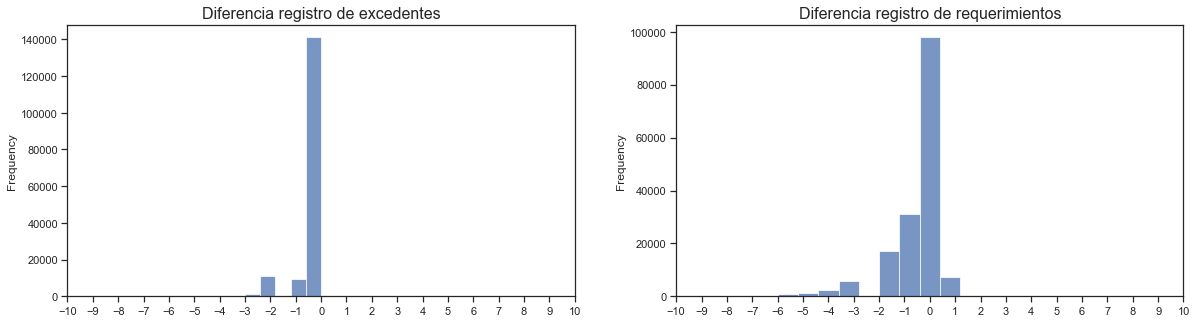

In [23]:
fig, axes = plt.subplots(1,2)

histograma_dif_exc = base_inicial_primaria['np_dif_excedentes'].plot(kind = "hist", alpha = 0.75, bins = 50, ax=axes[0]) 
histograma_dif_req = base_inicial_primaria['np_dif_requerimientos'].plot(kind = "hist", alpha = 0.75, bins = 50, ax=axes[1])
            
histograma_dif_exc.xaxis.set_major_locator(ticker.MultipleLocator(1))
histograma_dif_exc.xaxis.set_major_formatter(ticker.ScalarFormatter())

histograma_dif_req.xaxis.set_major_locator(ticker.MultipleLocator(1))
histograma_dif_req.xaxis.set_major_formatter(ticker.ScalarFormatter())            

ax1 = plt.subplot(121)
ax1.set_title("Diferencia registro de excedentes", fontsize=16)
ax1.set_xlim([-10, 10])

ax2 = plt.subplot(122)
ax2.set_title("Diferencia registro de requerimientos", fontsize=16)
ax2.set_xlim([-10, 10])

plt.show()

Text(0, 0.5, 'Diferencia promedio')

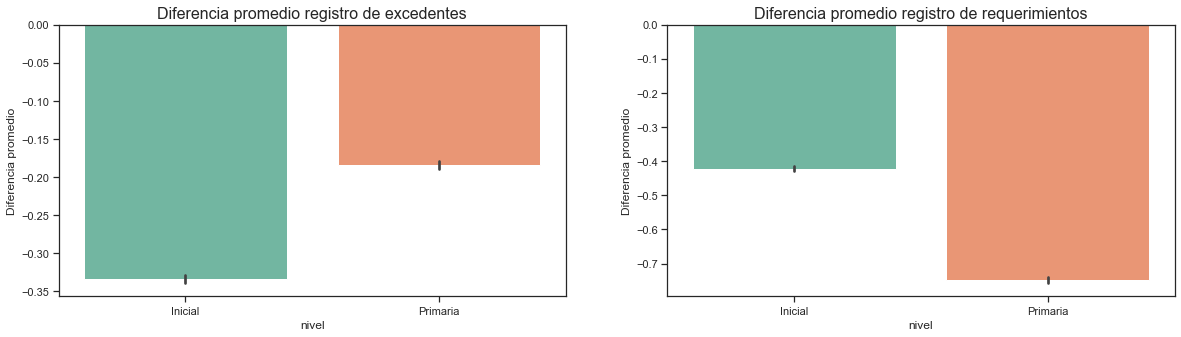

In [24]:
# Excedente de docentes por niv_mod
fig, axes = plt.subplots(1,2)
sns.set_style("ticks")

sns.barplot(x='nivel', y='np_dif_excedentes', data=base_inicial_primaria, 
            palette='Set2', order=['Inicial', 'Primaria'],  ax=axes[0])

sns.barplot(x='nivel', y='np_dif_requerimientos', data=base_inicial_primaria, 
            palette='Set2', order=['Inicial', 'Primaria'],  ax=axes[1])

ax1 = plt.subplot(121)
ax1.set_title("Diferencia promedio registro de excedentes", fontsize=16)
ax1.set_ylabel("Diferencia promedio")

ax2 = plt.subplot(122)
ax2.set_title("Diferencia promedio registro de requerimientos", fontsize=16)
ax2.set_ylabel("Diferencia promedio")

<a id='plaza_aux_educ'></a>
### 2.2.2 Auxiliares de educación

* <p style='text-align: justify;'> La distribución de la diferencia entre las plazas de auxiliares de educación y la asignación según norma muestra un mayor requerimiento que excedencia de plazas. Al ver por nivel educativo, se observa que en inicial en promedio hay mayor requerimiento mientras que en secundaria existe excedencia. </p>

In [25]:
base['aux_asig']=0
base['np_aux_asig'] = np.array(base['aux_asig'])
base['np_aux_nom'] = np.array(base['aux_n'])
base['np_aux_vac'] = np.array(base['aux_c'])
base['np_req_aux'] = np.array(base['aux_req'])

base.loc[(base['niv_mod']=="F0"), 'np_aux_asig' ] = base['np_secciones_norma'] / 8
base.loc[((base['niv_mod'].str.find('A')!=-1)), 'np_aux_asig'] = base['np_secciones_norma'] / 2
base[f'np_aux_asig'] = base[f'np_aux_asig'].apply(lambda X: int(math.floor(X)))

base['np_aux_dif_asig'] = base['np_aux_nom'] + base['np_aux_vac'] - base['np_aux_asig']

base_inicial_secundaria = base.loc[base['niv_mod']!="B0"] 


In [26]:
#Intervalo de diferencia para excedentes de docentes
    
k = 1 + 3.322 * math.log10(len(base_inicial_secundaria['np_aux_dif_asig']))
periodos = math.ceil(k)

inf = base_inicial_secundaria['np_aux_dif_asig'].min()        # Limite inferior del primer intervalo
dif = base_inicial_secundaria['np_aux_dif_asig'].max()
sup = base_inicial_secundaria['np_aux_dif_asig'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

intervalos = pd.IntervalIndex([
    pd.Interval( round(i.left,0), round(i.right,0), i.closed )
    for i in intervals
])
df = pd.DataFrame(index=intervalos)
df['FreqAbs'] = pd.cut(base['np_aux_dif_asig'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
"[-9.0, -8.0)",1,-8.5,-9.0,-8.0
"[-8.0, -6.0)",16,-7.0,-8.0,-6.0
"[-6.0, -5.0)",47,-5.5,-6.0,-5.0
"[-5.0, -4.0)",149,-4.5,-5.0,-4.0
"[-4.0, -2.0)",2507,-3.0,-4.0,-2.0
"[-2.0, -1.0)",5657,-1.5,-2.0,-1.0
"[-1.0, 0.0)",15956,-0.5,-1.0,0.0
"[0.0, 2.0)",167462,1.0,0.0,2.0
"[2.0, 3.0)",650,2.5,2.0,3.0
"[3.0, 5.0)",216,4.0,3.0,5.0


Text(0, 0.5, 'Frecuencia')

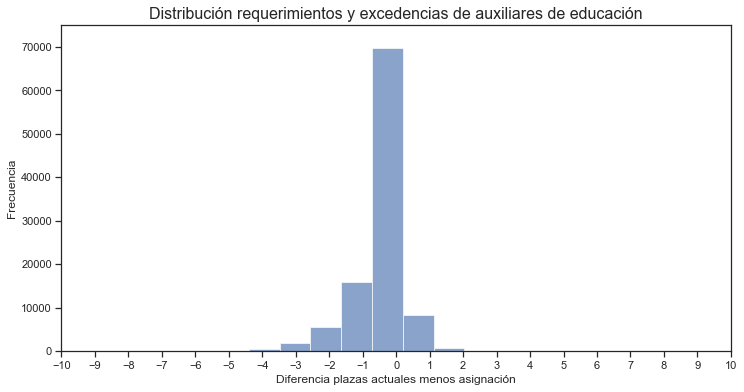

In [27]:
fig, ax = plt.subplots(figsize = (12,6))

histograma_aux_educ = base_inicial_secundaria['np_aux_dif_asig'].plot(kind = "hist", alpha = 0.65, bins = 25)

histograma_aux_educ.xaxis.set_major_locator(ticker.MultipleLocator(1))
histograma_aux_educ.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.set_title("Distribución requerimientos y excedencias de auxiliares de educación", fontsize=16)

ax.set_xlabel("Diferencia plazas actuales menos asignación")
ax.set_xlim(-10, 10)

ax.set_ylim(0, 75000)
ax.set_ylabel("Frecuencia")

- Tiende a haber una falta de auxiliares más que tener excedentes

Text(0, 0.5, 'Diferencia promedio')

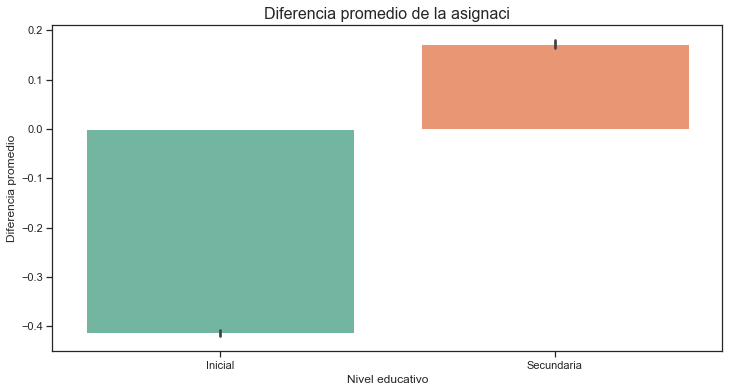

In [28]:
# Excedente de auxiliares por niv_mod

fig, ax = plt.subplots(figsize = (12,6))

ax.set_title("Diferencia promedio de la asignaci", fontsize=16)

sns.barplot(x='nivel', y='np_aux_dif_asig', data=base_inicial_secundaria,palette='Set2', order=['Inicial', 'Secundaria'])

ax.set_xlabel("Nivel educativo")
ax.set_ylabel("Diferencia promedio")

<a id='plaza_jerarquica'></a>

### 3. Jerárquicos

* <p style='text-align: justify;'> La distribución de la diferencia entre las plazas jerárquicas y la asignación según norma muestra una cola hacia la izquierda (requerimiento). </p>

In [29]:
base['np_jer_nom'] = np.array(base['jer_n'])
base['np_jer_vac'] = np.array(base['jer_c'])

base['jer_norma_20'] = (base['np_secciones_norma']) / 20 
base[f'jer_norma_20'] = base[f'jer_norma_20'].apply(lambda X: int(math.floor(X)))
base['jer_norma_20'] = base['jer_norma_20']*2

base['jer_norma_15'] = (base['np_secciones_norma']) / 15
base[f'jer_norma_15'] = base[f'jer_norma_15'].apply(lambda X: int(math.floor(X)))
base['jer_norma_15'] = base['jer_norma_15']*2

base['np_jer_norma'] = base['jer_norma_20'] + base['jer_norma_15']

base.loc[base['jec'] == "jec" , 'jer_norma' ] = 0 ## Jerárquicos es solo para JER
base.loc[base['niv_mod'] != "F0", 'jer_norma'] = 0 ## Jerárquicos es solo para secundaria

base['np_jer_dif_asig'] = base['np_jer_nom'] + base['np_jer_vac'] - base['np_jer_norma']

In [30]:
#Intervalo de diferencia asignación de jerárquicos
base_secundaria = base.loc[base['niv_mod']=="F0"] 

k = 1 + 3.322 * math.log10(len(base_secundaria['np_jer_dif_asig']))
periodos = math.ceil(k)

inf = base_secundaria['np_jer_dif_asig'].min()        # Limite inferior del primer intervalo
dif = base_secundaria['np_jer_dif_asig'].max()
sup = base_secundaria['np_jer_dif_asig'].max()        # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    periods=k,
    name="Intervalo",
    closed="left")

intervalos = pd.IntervalIndex([
    pd.Interval( round(i.left,0), round(i.right,0), i.closed )
    for i in intervals
])
df = pd.DataFrame(index=intervalos)
df['FreqAbs'] = pd.cut(base_secundaria['np_jer_dif_asig'], bins=df.index).value_counts()
df['Marca']  = df.index.mid

df['LimInf'] = df.index.left
df['LimSup'] = df.index.right
df

,FreqAbs,Marca,LimInf,LimSup
"[-17.0, -15.0)",4,-16.0,-17.0,-15.0
"[-15.0, -12.0)",25,-13.5,-15.0,-12.0
"[-12.0, -10.0)",23,-11.0,-12.0,-10.0
"[-10.0, -8.0)",78,-9.0,-10.0,-8.0
"[-8.0, -6.0)",131,-7.0,-8.0,-6.0
"[-6.0, -3.0)",1564,-4.5,-6.0,-3.0
"[-3.0, -1.0)",2285,-2.0,-3.0,-1.0
"[-1.0, 1.0)",24057,0.0,-1.0,1.0
"[1.0, 3.0)",733,2.0,1.0,3.0
"[3.0, 6.0)",90,4.5,3.0,6.0


Text(0, 0.5, 'Frecuencia')

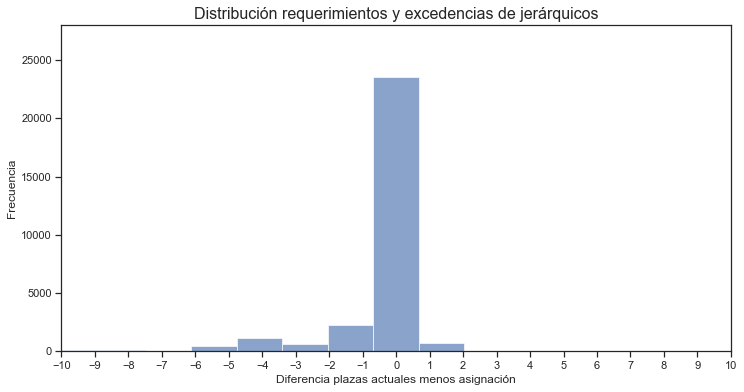

In [31]:
fig, ax = plt.subplots(figsize = (12,6))

histograma_jerarquico = base_secundaria['np_jer_dif_asig'].plot(kind = "hist", alpha = 0.65, bins = 25)

histograma_jerarquico.xaxis.set_major_locator(ticker.MultipleLocator(1))
histograma_jerarquico.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.set_title("Distribución requerimientos y excedencias de jerárquicos", fontsize=16)

ax.set_xlabel("Diferencia plazas actuales menos asignación")
ax.set_xlim(-10, 10)

ax.set_ylim(0, 28000)
ax.set_ylabel("Frecuencia")


<a id='plaza_director'></a>

### 4. Directores

* <p style='text-align: justify;'> La distribución indicaría que existe un requerimiento de plazas directivas pero la mayoría de ellos se encuentran en IIEE micro o pequeñas, menos de 60 estudiantes. </p>

In [32]:
# Primero, hacemos un collapse sobre la base, para trabajarlo a nivel de local educativo:

base['vraem_d'] = 1
base.loc[(base['vraem']=="No Vraem"), 'vraem_d' ] = 0

base['frontera_d'] = 1
base.loc[(base['frontera']=="No frontera"), 'frontera_d' ] = 0

base['ruralidad_d'] = 0
base.loc[(base['ruralidad']=="Rural 1"), 'ruralidad_d' ] = 3
base.loc[(base['ruralidad']=="Rural 2"), 'ruralidad_d' ] = 2
base.loc[(base['ruralidad']=="Rural 3"), 'ruralidad_d' ] = 1

base['bilingue_d'] = 1
base.loc[(base['bilingue']=="No bilingue"), 'bilingue_d' ] = 0

base_collapse = base.groupby(['codlocal','year'], as_index=False)[['dir_n','dir_c','dir_req','doc_aula_n',
                                            'doc_aula_c','doc_exc','secciones_norma',
                                            'secciones_ajuste','sub_dir_n','sub_dir_c',
                                            'sub_dir_req','np_doc_exc','np_aux_dif_asig',
                                            'np_jer_dif_asig','vraem_d','frontera_d',
                                            'ruralidad_d','bilingue_d']].agg(['sum']).reset_index()

In [33]:
base_collapse['dir_norma'] = 1
base_collapse['np_dir_norma'] = np.array(base_collapse['dir_norma'])
base_collapse['np_dir_nom'] = np.array(base_collapse['dir_n'])
base_collapse['np_dir_vac'] = np.array(base_collapse['dir_c'])
base_collapse['np_req_dir'] = np.array(base_collapse['dir_req'])

base_collapse['np_dir_local'] = base_collapse['np_dir_nom'] + base_collapse['np_dir_vac']
base_collapse['np_dir_dif_asig'] = base_collapse['np_dir_local'] - base_collapse['np_dir_norma']


Text(0, 0.5, 'Frecuencia')

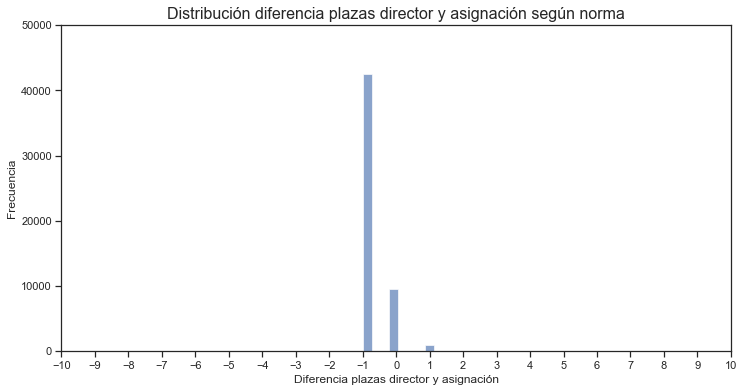

In [34]:
fig, ax = plt.subplots(figsize = (12,6))

base_collapse_2021 = base_collapse[base_collapse['year']==2021]

histograma_2021 = base_collapse_2021['np_dir_dif_asig'].plot(kind = "hist", alpha = 0.65, bins = 15)

histograma_2021.xaxis.set_major_locator(ticker.MultipleLocator(1))
histograma_2021.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.set_title("Distribución diferencia plazas director y asignación según norma", fontsize=16)

ax.set_xlabel("Diferencia plazas director y asignación")
ax.set_xlim(-10,10)

ax.set_ylim(0, 50000)
ax.set_ylabel("Frecuencia")



<a id='plaza_sub_director'></a>

### 5. Subdirectores

* <p style='text-align: justify;'> Se observa una de subidrectores donde la moda es el requerimiento de una plaza de subdirector. </p>

In [35]:
base_collapse['np_sub_dir_nom'] = np.array(base_collapse['sub_dir_n'])
base_collapse['np_sub_dir_vac'] = np.array(base_collapse['sub_dir_c'])
base_collapse['np_req_sub'] = np.array(base_collapse['sub_dir_req'])
base_collapse['np_doc_nom'] = np.array(base_collapse['doc_aula_n'])
base_collapse['np_doc_vac'] = np.array(base_collapse['doc_aula_c'])

base_collapse['np_doc_total'] = base_collapse['np_doc_nom'] + base_collapse['np_doc_vac']


base_collapse['np_asig_sub'] = (base_collapse['np_doc_total'])/20
base_collapse.loc[base_collapse['np_doc_total'] < 10 , 'np_asig_sub'] = 0
base_collapse.loc[(base_collapse['np_doc_total'] >= 10) & (base_collapse['np_doc_total'] <= 20) , 'np_asig_sub' ] = 1


base_collapse[f'np_asig_sub'] = base_collapse[f'np_asig_sub'].apply(lambda X: int(math.ceil(X)))
base_collapse['np_asig_sub'] = base_collapse['np_asig_sub'].astype(np.int8)  

base_collapse['np_sub_dif_asig'] = base_collapse['np_sub_dir_nom'] + base_collapse['np_sub_dir_vac'] - base_collapse['np_asig_sub']


Text(0, 0.5, 'Frecuencia')

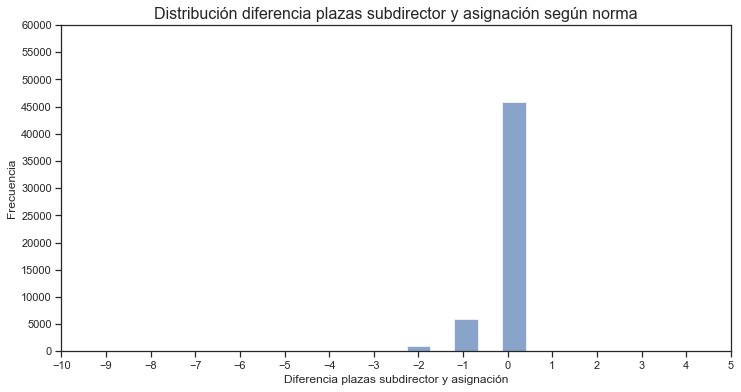

In [36]:
fig, ax = plt.subplots(figsize = (12,6))

base_collapse_2021 = base_collapse[base_collapse['year']==2021]

histograma_2021 = base_collapse_2021['np_sub_dif_asig'].plot(kind = "hist", alpha = 0.65, bins = 15)

histograma_2021.xaxis.set_major_locator(ticker.MultipleLocator(1))
histograma_2021.yaxis.set_major_locator(ticker.MultipleLocator(5000))

histograma_2021.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.set_title("Distribución diferencia plazas subdirector y asignación según norma", fontsize=16)

ax.set_xlabel("Diferencia plazas subdirector y asignación")
ax.set_xlim(-10,5)

ax.set_ylim(0, 60000)
ax.set_ylabel("Frecuencia")



## Matriz de Correlaciones

In [37]:
base_corr = base_collapse[["np_doc_exc", "np_aux_dif_asig", "np_jer_dif_asig", 
                           "np_dir_dif_asig", "np_sub_dif_asig", "vraem_d", 
                           "frontera_d", "bilingue_d", "ruralidad_d", "secciones_ajuste"]]

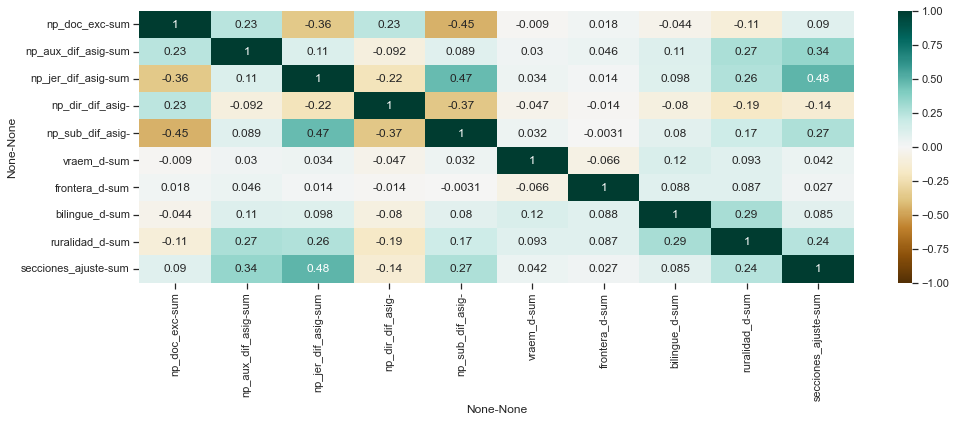

In [38]:
plt.figure(figsize=(16,5))
sns.heatmap(base_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()